In [ ]:
import sys

!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

!pip uninstall scikit-learn -y
!pip install -U scikit-learn
!pip install scikeras
!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 27.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=26ed030d8786ba320ae275223472c331de213c95b5e3b54c4f606c8

In [ ]:
from typing import List
import matplotlib.pyplot as plt

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import random
from matplotlib import pyplot
from matplotlib.colors import ListedColormap

import os, shutil
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.linear_model import LogisticRegression
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils import class_weight, compute_sample_weight
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import (
    GridSearchCV,
    StratifiedKFold,
    LeaveOneOut,
    cross_val_score,
    train_test_split,
)

import requests

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!cp "/content/drive/My Drive/Spaceship Titanic/kaggle.json" ~/.kaggle/
!pip install kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets list

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/apple-quality                                     Apple Quality                                      170KB  2024-01-11 14:31:07           4863        120  1.0              
hummaamqaasim/jobs-in-data                                         Jobs and Salaries in Data Science                   76KB  2023-12-25 20:03:32          11432        217  1.0              
juledz/heart-attack-prediction                                     Heart Attack Prediction                              8KB  2024-01-19 16:11:46           1471         38  1.0              
joebeachcapital/57651-spotify-songs               

In [ ]:
DATA_PATH = "/content/drive/MyDrive/Spaceship Titanic/Dati/"
IMAGE_PATH = "/content/drive/MyDrive/Spaceship Titanic/Immagini/Tecniche di ML/"
OUTPUT_PATH = "kaggle_submissions/"

In [ ]:
dataset_13 = pd.read_csv(DATA_PATH + "train_13.csv")
train_13, y_train_13 = dataset_13.drop(columns=['Unnamed: 0','Transported']), dataset_13.Transported
train_13

,gggg,Deck,Cabin_num,Side,HomePlanet,Destination,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,1,0,0,1,0,0,39.0,0.0,0.0,0.0,0.0,0.0
1,2,5,0,1,0,0,0,24.0,109.0,9.0,25.0,549.0,44.0
2,3,0,0,1,1,0,0,58.0,43.0,3576.0,0.0,6715.0,49.0
3,3,0,0,1,1,0,0,33.0,0.0,1283.0,371.0,3329.0,193.0
4,4,5,1,1,0,0,0,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276,0,98,0,1,1,0,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,9278,6,1499,1,0,2,1,18.0,0.0,0.0,0.0,0.0,0.0
8690,9279,6,1500,1,0,0,0,26.0,0.0,0.0,1872.0,1.0,0.0
8691,9280,4,608,1,1,1,0,32.0,0.0,1049.0,0.0,353.0,3235.0


In [ ]:
dataset_22 = pd.read_csv(DATA_PATH + "train_22.csv")
train_22, y_train_22 = dataset_22.drop(columns=['Unnamed: 0','Transported']), dataset_22.Transported
train_22

,gggg,Deck_B,Deck_C,Deck_E,Deck_F,Deck_G,Cabin_num,Side_P,Side_S,HomePlanet_Earth,...,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,1,0,0,0,0,0,1,0,0,...,0,0,1,0,39.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0,0,1,0,0,0,1,1,...,0,0,1,0,24.0,109.0,9.0,25.0,549.0,44.0
2,3,0,0,0,0,0,0,0,1,0,...,0,0,1,0,58.0,43.0,3576.0,0.0,6715.0,49.0
3,3,0,0,0,0,0,0,0,1,0,...,0,0,1,0,33.0,0.0,1283.0,371.0,3329.0,193.0
4,4,0,0,0,1,0,1,0,1,1,...,0,0,1,0,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276,0,0,0,0,0,98,1,0,0,...,1,0,0,0,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,9278,0,0,0,0,1,1499,0,1,1,...,0,1,0,1,18.0,0.0,0.0,0.0,0.0,0.0
8690,9279,0,0,0,0,1,1500,0,1,1,...,0,0,1,0,26.0,0.0,0.0,1872.0,1.0,0.0
8691,9280,0,0,1,0,0,608,0,1,0,...,1,0,0,0,32.0,0.0,1049.0,0.0,353.0,3235.0


Si creano dieci sottoinsiemi di train-test sempre uguali

In [ ]:
skf = StratifiedKFold(n_splits=10)
cross_validation_13 = skf.get_n_splits(train_13, y_train_13)
cross_validation_22 = skf.get_n_splits(train_22, y_train_22)

Si valuta l'efficacia dell'implementazione standard della Logistic Regression

In [ ]:
simplefilter("ignore", category=ConvergenceWarning)

# numero di iterazioni per ottenere convergenza con tutti i solver
maxIter = 10000
lgr = LogisticRegression(max_iter=maxIter)
scores = cross_val_score(lgr, train_13, y_train_13, cv=cross_validation_13)
print("Accuratezza default Logistic Regression 13 per ogni singolo sottoinsieme di training: ")
print(scores)
print("\nAccuratezza media default Logistic Regression 13: ")
print(scores.mean())

scores = cross_val_score(lgr, train_22, y_train_22, cv=cross_validation_22)
print("\nAccuratezza default Logistic Regression 22 per ogni singolo sottoinsieme di training: ")
print(scores)
print("\nAccuratezza media default Logistic Regression 22: ")
print(scores.mean())

Accuratezza default Logistic Regression 13 per ogni singolo sottoinsieme di training: 
[0.77126437 0.75172414 0.76896552 0.80552359 0.79171461 0.8009206
 0.78365938 0.79516686 0.81472957 0.76179517]

Accuratezza media default Logistic Regression 13: 
0.7845463804346389

Accuratezza default Logistic Regression 22 per ogni singolo sottoinsieme di training: 
[0.78275862 0.75747126 0.77471264 0.79976985 0.8009206  0.79746835
 0.78596087 0.79976985 0.80667434 0.77790564]

Accuratezza media default Logistic Regression 22: 
0.7883412033913999


In [ ]:
simplefilter("ignore", category=ConvergenceWarning)

lgr_lbfgs_l2 = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=maxIter)
scores_lbfgs_l2_13 = cross_val_score(lgr_lbfgs_l2, train_13, y_train_13, cv=cross_validation_13)
scores_lbfgs_l2_22 = cross_val_score(lgr_lbfgs_l2, train_22, y_train_22, cv=cross_validation_22)

lgr_lbfgs_None = LogisticRegression(solver='lbfgs', penalty=None, max_iter=maxIter)
scores_lbfgs_None_13 = cross_val_score(lgr_lbfgs_None, train_13, y_train_13, cv=cross_validation_13)
scores_lbfgs_None_22 = cross_val_score(lgr_lbfgs_None, train_22, y_train_22, cv=cross_validation_22)

lgr_liblinear_l1 = LogisticRegression(solver='liblinear', penalty='l1', max_iter=maxIter)
scores_liblinear_l1_13 = cross_val_score(lgr_liblinear_l1, train_13, y_train_13, cv=cross_validation_13)
scores_liblinear_l1_22 = cross_val_score(lgr_liblinear_l1, train_22, y_train_22, cv=cross_validation_22)

lgr_liblinear_l2 = LogisticRegression(solver='liblinear', penalty='l2', max_iter=maxIter)
scores_liblinear_l2_13 = cross_val_score(lgr_liblinear_l2, train_13, y_train_13, cv=cross_validation_13)
scores_liblinear_l2_22 = cross_val_score(lgr_liblinear_l2, train_22, y_train_22, cv=cross_validation_22)

lgr_sag_l2 = LogisticRegression(solver='sag', penalty='l2', max_iter=maxIter)
scores_sag_l2_13 = cross_val_score(lgr_sag_l2, train_13, y_train_13, cv=cross_validation_13)
scores_sag_l2_22 = cross_val_score(lgr_sag_l2, train_22, y_train_22, cv=cross_validation_22)

lgr_sag_None = LogisticRegression(solver='sag', penalty=None, max_iter=maxIter)
scores_sag_None_13 = cross_val_score(lgr_sag_None, train_13, y_train_13, cv=cross_validation_13)
scores_sag_None_22 = cross_val_score(lgr_sag_None, train_22, y_train_22, cv=cross_validation_22)

lgr_saga_l1 = LogisticRegression(solver='saga', penalty='l1', max_iter=maxIter)
scores_saga_l1_13 = cross_val_score(lgr_saga_l1, train_13, y_train_13, cv=cross_validation_13)
scores_saga_l1_22 = cross_val_score(lgr_saga_l1, train_22, y_train_22, cv=cross_validation_22)

lgr_saga_l2 = LogisticRegression(solver='saga', penalty='l2', max_iter=maxIter)
scores_saga_l2_13 = cross_val_score(lgr_saga_l2, train_13, y_train_13, cv=cross_validation_13)
scores_saga_l2_22 = cross_val_score(lgr_saga_l2, train_22, y_train_22, cv=cross_validation_22)

lgr_saga_elasticnet = LogisticRegression(solver='saga', penalty='elasticnet', max_iter=maxIter, l1_ratio=0.5)
scores_saga_elasticnet_13 = cross_val_score(lgr_saga_elasticnet, train_13, y_train_13, cv=cross_validation_13)
scores_saga_elasticnet_22 = cross_val_score(lgr_saga_elasticnet, train_22, y_train_22, cv=cross_validation_22)

lgr_saga_None = LogisticRegression(solver='saga', penalty=None, max_iter=maxIter)
scores_saga_None_13 = cross_val_score(lgr_saga_None, train_13, y_train_13, cv=cross_validation_13)
scores_saga_None_22 = cross_val_score(lgr_saga_None, train_22, y_train_22, cv=cross_validation_22)

In [ ]:
columns = ['Method', 'Score_13', 'Score_22']

data = [['lbfgs_l2', scores_lbfgs_l2_13.mean(), scores_lbfgs_l2_22.mean()],
        ['lbfgs_None', scores_lbfgs_None_13.mean(), scores_lbfgs_None_22.mean()],
        ['liblinear_l1', scores_liblinear_l1_13.mean(), scores_liblinear_l1_22.mean()],
        ['liblinear_l2', scores_liblinear_l2_13.mean(), scores_liblinear_l2_22.mean()],
        ['sag_l2', scores_sag_l2_13.mean(), scores_sag_l2_22.mean()],
        ['sag_None', scores_sag_None_13.mean(), scores_sag_None_22.mean()],
        ['saga_l1', scores_saga_l1_13.mean(), scores_saga_l1_22.mean()],
        ['saga_l2', scores_saga_l2_13.mean(), scores_saga_l2_22.mean()],
        ['saga_elasticnet', scores_saga_elasticnet_13.mean(), scores_saga_elasticnet_22.mean()],
        ['saga_None', scores_saga_None_13.mean(), scores_saga_None_22.mean()]]

method_score = pd.DataFrame(data=data, columns=columns)
method_score

,Method,Score_13,Score_22
0,lbfgs_l2,0.784201,0.786041
1,lbfgs_None,0.784547,0.787191
2,liblinear_l1,0.784661,0.788571
3,liblinear_l2,0.784086,0.789032
4,sag_l2,0.781666,0.781205
5,sag_None,0.781666,0.781205
6,saga_l1,0.781665,0.781550
7,saga_l2,0.781665,0.781550
8,saga_elasticnet,0.781665,0.781550
9,saga_None,0.781665,0.781550


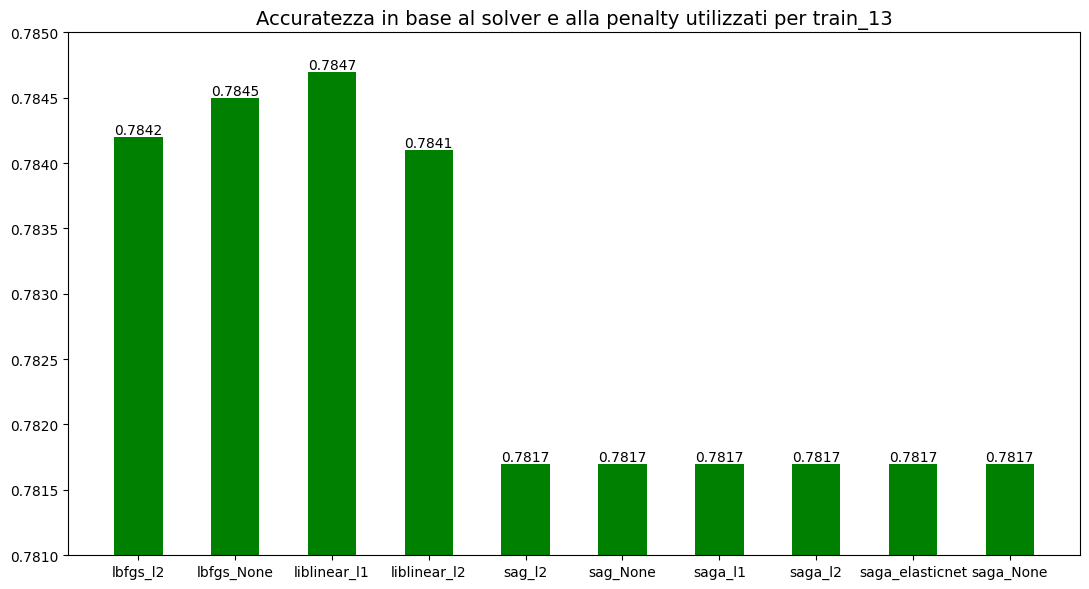

In [ ]:
fig, ax = plt.subplots(figsize=(11,6))
bar_container = ax.bar(method_score.Method, np.round(method_score.Score_13, 4), color='g', width=0.5)
ax.set_title(label='Accuratezza in base al solver e alla penalty utilizzati per train_13', fontsize=14)
ax.set_ylim(0.781, 0.785)
ax.bar_label(bar_container)

plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "LR_solver_13.png")):
  plt.savefig(IMAGE_PATH + "LR_solver_13.png", format="png")
plt.show()

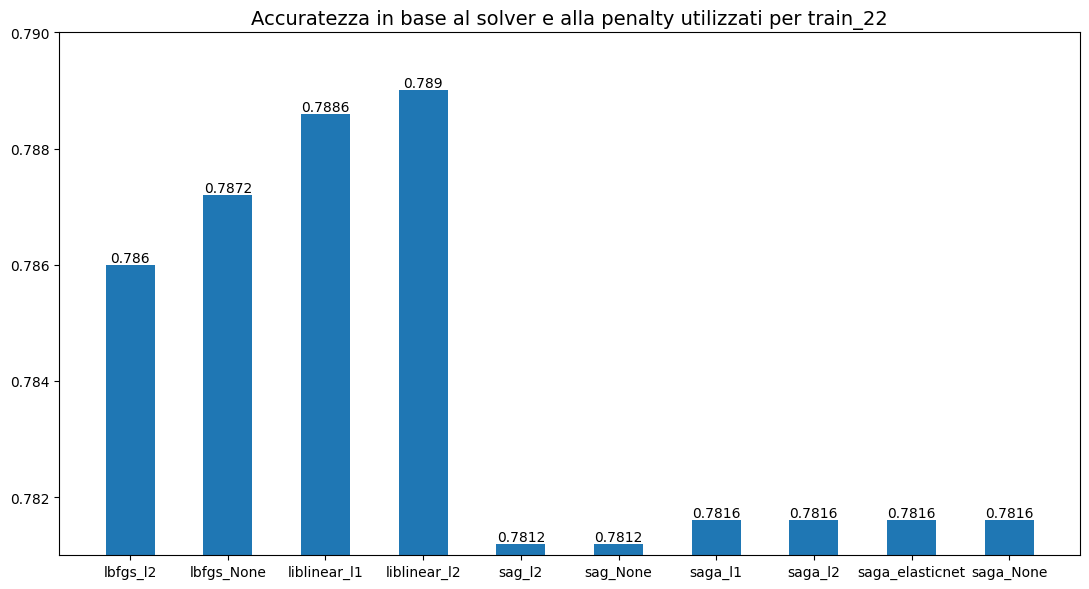

In [ ]:
fig, ax = plt.subplots(figsize=(11,6))
bar_container = ax.bar(method_score.Method, np.round(method_score.Score_22, 4), width=0.5)
ax.set_title(label='Accuratezza in base al solver e alla penalty utilizzati per train_22', fontsize=14)
ax.set_ylim(0.781, 0.790)
ax.bar_label(bar_container)

plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "LR_solver_22.png")):
  plt.savefig(IMAGE_PATH + "LR_solver_22.png", format="png")
plt.show()

Setting the tolerance

In [ ]:
def set_tolerance(train, test, solver, penalty):
  columns = ['Tolerance', 'Score']
  tolerance_score = pd.DataFrame(columns=columns)
  tolerances = [0.000001, 0.000005, 0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01]

  for t in tolerances:
    lgr = LogisticRegression(solver=solver, penalty=penalty, max_iter=maxIter, tol=t)
    scores = cross_val_score(lgr, train, test, cv=10)
    row = pd.DataFrame(data=[[t, scores.mean()]], columns=columns)
    tolerance_score = pd.concat([tolerance_score, row])

  return tolerance_score

In [ ]:
tolerance_score_13 = set_tolerance(train_13, y_train_13, 'liblinear','l1')
tolerance_score_13

,Tolerance,Score
0,0.000001,0.784661
0,0.000005,0.784661
0,0.000010,0.784661
0,0.000050,0.784661
0,0.000100,0.784661
0,0.000500,0.784431
0,0.001000,0.784546
0,0.005000,0.783856
0,0.010000,0.784316


In [ ]:
tolerance_score_22 = set_tolerance(train_22, y_train_22, 'liblinear','l2')
tolerance_score_22

,Tolerance,Score
0,0.000001,0.788456
0,0.000005,0.788456
0,0.000010,0.788341
0,0.000050,0.788111
0,0.000100,0.789032
0,0.000500,0.789262
0,0.001000,0.791561
0,0.005000,0.781205
0,0.010000,0.783389


Tolerance migliore per train_13: 0.0001 (default)

Tolerance migliore per train_22: 0.001

Settining C

In [ ]:
def set_c(train, test, solver, penalty, t):
  columns = ['C', 'Score']
  c_score = pd.DataFrame(columns=columns)
  c_values = np.linspace(1, 2, 11, dtype=float)

  for c in c_values:
    lgr = LogisticRegression(solver=solver, penalty=penalty, max_iter=maxIter, tol=t, C=c)
    scores = cross_val_score(lgr, train, test, cv=10)
    row = pd.DataFrame(data=[[c, scores.mean()]], columns=columns)
    c_score = pd.concat([c_score, row])

  return c_score

In [ ]:
c_score_13 = set_c(train_13, y_train_13, 'liblinear','l1', 0.0001)
c_score_13

,C,Score
0,1.0,0.784546
0,1.1,0.784891
0,1.2,0.784776
0,1.3,0.784661
0,1.4,0.784776
0,1.5,0.784776
0,1.6,0.784776
0,1.7,0.784776
0,1.8,0.784776
0,1.9,0.784776


In [ ]:
c_score_22 = set_c(train_22, y_train_22, 'liblinear','l2', 0.001)
c_score_22

,C,Score
0,1.0,0.791561
0,1.1,0.792828
0,1.2,0.790757
0,1.3,0.793173
0,1.4,0.787880
0,1.5,0.789376
0,1.6,0.791677
0,1.7,0.792713
0,1.8,0.788800
0,1.9,0.793978


C migliore per train_13: 1.1

C migliore per train_22: 1.9

Setting intercept_scaling (serve solo se fit_intercept=True)

In [ ]:
def set_intercept_scaling(train, test, solver, penalty, t, c):
  columns = ['Intercept_Scaling', 'Score']
  intercept_scaling_score = pd.DataFrame(columns=columns)
  intercept_scaling_values = np.linspace(0.5, 5, 10, dtype=float)

  for i in intercept_scaling_values:
    lgr = LogisticRegression(solver=solver, penalty=penalty, max_iter=maxIter, tol=t, C=c, intercept_scaling=i)
    scores = cross_val_score(lgr, train, test, cv=10)
    row = pd.DataFrame(data=[[i, scores.mean()]], columns=columns)
    intercept_scaling_score = pd.concat([intercept_scaling_score, row])

  return intercept_scaling_score

In [ ]:
intercept_scaling_score_13 = set_intercept_scaling(train_13, y_train_13, 'liblinear','l1', 0.0001, 1.1)
intercept_scaling_score_13

,Intercept_Scaling,Score
0,0.5,0.784431
0,1.0,0.784661
0,1.5,0.784776
0,2.0,0.784776
0,2.5,0.784891
0,3.0,0.785006
0,3.5,0.784891
0,4.0,0.784891
0,4.5,0.784891
0,5.0,0.784891


In [ ]:
intercept_scaling_score_22 = set_intercept_scaling(train_22, y_train_22, 'liblinear','l2',  0.001, 1.9)
intercept_scaling_score_22

,Intercept_Scaling,Score
0,0.5,0.791447
0,1.0,0.793978
0,1.5,0.788456
0,2.0,0.790296
0,2.5,0.787191
0,3.0,0.789838
0,3.5,0.790988
0,4.0,0.786845
0,4.5,0.787996
0,5.0,0.789721


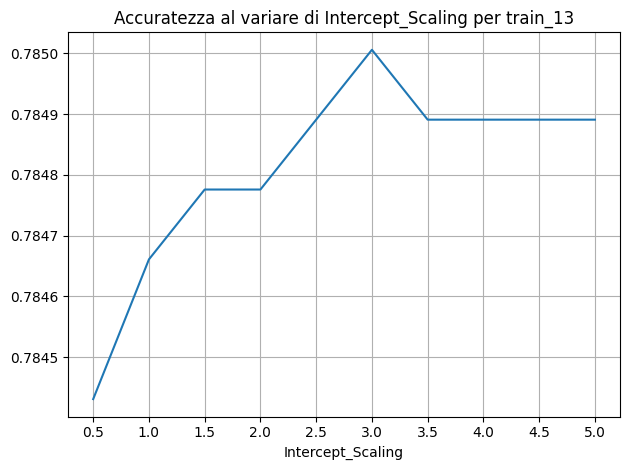

In [ ]:
fig, ax = plt.subplots()
ax.plot(intercept_scaling_score_13.Intercept_Scaling, intercept_scaling_score_13.Score)
ax.set(xlabel='Intercept_Scaling', title="Accuratezza al variare di Intercept_Scaling per train_13")
ax.set_xticks(np.linspace(0.5, 5, 10, dtype=float))
ax.grid()
plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "LR_Intercept_Scaling_13.png")):
  plt.savefig(IMAGE_PATH + "LR_Intercept_Scaling_13.png", format="png")
plt.show()

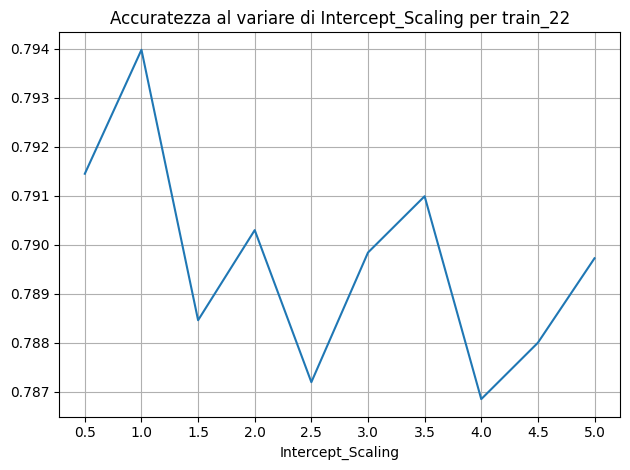

In [ ]:
fig, ax = plt.subplots()
ax.plot(intercept_scaling_score_22.Intercept_Scaling, intercept_scaling_score_22.Score)
ax.set(xlabel='Intercept_Scaling', title="Accuratezza al variare di Intercept_Scaling per train_22")
ax.set_xticks(np.linspace(0.5, 5, 10, dtype=float))
ax.grid()
plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "LR_Intercept_Scaling_22.png")):
  plt.savefig(IMAGE_PATH + "LR_Intercept_Scaling_22.png", format="png")
plt.show()

intercept_scaling migliore per train_13: 3

intercept_scaling migliore per train_22: 1 (default)

In [ ]:
#ADDESTRAMENTO train_13

lgr_13 = LogisticRegression(solver='liblinear', penalty='l1', max_iter=maxIter, C=1.1, intercept_scaling=3)
parameter_grid_13 = {
    'random_state': [None, 0, 25, 42, 70, 88],
    'warm_start': [True, False]
}

# Create and fit the GridSearchCV
grid_search_13 = GridSearchCV(
    estimator=lgr_13,
    param_grid=parameter_grid_13,
    cv=cross_validation_13,
    verbose=3,
    return_train_score=True,
)

grid_search_13.fit(train_13, y_train_13)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END random_state=None, warm_start=True;, score=(train=0.790, test=0.772) total time=   0.1s
[CV 2/10] END random_state=None, warm_start=True;, score=(train=0.794, test=0.753) total time=   0.1s
[CV 3/10] END random_state=None, warm_start=True;, score=(train=0.792, test=0.770) total time=   0.1s
[CV 4/10] END random_state=None, warm_start=True;, score=(train=0.787, test=0.806) total time=   0.1s
[CV 5/10] END random_state=None, warm_start=True;, score=(train=0.789, test=0.792) total time=   0.1s
[CV 6/10] END random_state=None, warm_start=True;, score=(train=0.786, test=0.801) total time=   0.1s
[CV 7/10] END random_state=None, warm_start=True;, score=(train=0.787, test=0.784) total time=   0.1s
[CV 8/10] END random_state=None, warm_start=True;, score=(train=0.787, test=0.795) total time=   0.1s
[CV 9/10] END random_state=None, warm_start=True;, score=(train=0.786, test=0.815) total time=   0.1s
[CV 10/10] END rand

GridSearchCV(cv=10,
             estimator=LogisticRegression(C=1.1, intercept_scaling=3,
                                          max_iter=10000, penalty='l1',
                                          solver='liblinear'),
             param_grid={'random_state': [None, 0, 25, 42, 70, 88],
                         'warm_start': [True, False]},
             return_train_score=True, verbose=3)

In [ ]:
print("Best score: {}".format(grid_search_13.best_score_))
print("Best parameters: {}".format(grid_search_13.best_params_))

best_lgr_13 = grid_search_13.best_estimator_
best_lgr_13.fit(train_13, y_train_13)

Best score: 0.7850062828194648
Best parameters: {'random_state': None, 'warm_start': True}


LogisticRegression(C=1.1, intercept_scaling=3, max_iter=10000, penalty='l1',
                   solver='liblinear', warm_start=True)

In [ ]:
#ADDESTRAMENTO train_22

lgr_22 = LogisticRegression(solver='liblinear', penalty='l2', max_iter=maxIter, tol=0.001, C=1.9)
parameter_grid_22 = {
    'fit_intercept': [True, False],
    'random_state': [None, 0, 42, 70],
    'warm_start': [True, False]
}

# Create and fit the GridSearchCV
grid_search_22 = GridSearchCV(
    estimator=lgr_22,
    param_grid=parameter_grid_22,
    cv=cross_validation_22,
    verbose=3,
    return_train_score=True,
)

grid_search_22.fit(train_22, y_train_22)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV 1/10] END fit_intercept=True, random_state=None, warm_start=True;, score=(train=0.794, test=0.794) total time=   0.1s
[CV 2/10] END fit_intercept=True, random_state=None, warm_start=True;, score=(train=0.796, test=0.756) total time=   0.1s
[CV 3/10] END fit_intercept=True, random_state=None, warm_start=True;, score=(train=0.796, test=0.779) total time=   0.1s
[CV 4/10] END fit_intercept=True, random_state=None, warm_start=True;, score=(train=0.792, test=0.795) total time=   0.1s
[CV 5/10] END fit_intercept=True, random_state=None, warm_start=True;, score=(train=0.792, test=0.797) total time=   0.1s
[CV 6/10] END fit_intercept=True, random_state=None, warm_start=True;, score=(train=0.790, test=0.815) total time=   0.1s
[CV 7/10] END fit_intercept=True, random_state=None, warm_start=True;, score=(train=0.793, test=0.818) total time=   0.1s
[CV 8/10] END fit_intercept=True, random_state=None, warm_start=True;, score=(train

GridSearchCV(cv=10,
             estimator=LogisticRegression(C=1.9, max_iter=10000,
                                          solver='liblinear', tol=0.001),
             param_grid={'fit_intercept': [True, False],
                         'random_state': [None, 0, 42, 70],
                         'warm_start': [True, False]},
             return_train_score=True, verbose=3)

In [ ]:
print("Best score: {}".format(grid_search_22.best_score_))
print("Best parameters: {}".format(grid_search_22.best_params_))

best_lgr_22 = grid_search_22.best_estimator_
best_lgr_22.fit(train_22, y_train_22)

Best score: 0.7939781490152507
Best parameters: {'fit_intercept': True, 'random_state': None, 'warm_start': True}


LogisticRegression(C=1.9, max_iter=10000, solver='liblinear', tol=0.001,
                   warm_start=True)

Valutazione train_13 e train_22 con aggiunta di Service_use ed Expenses

In [ ]:
#train_13
maxIter = 10000

lgr_14 = LogisticRegression(solver='liblinear', penalty='l1', max_iter=maxIter, C=1.1, intercept_scaling=3, warm_start=True)
train_14 = train_13.copy()
train_14['Service_use'] = 0
train_14['Service_use']  = train_14['VRDeck'] + train_14['RoomService'] + train_14['FoodCourt'] + train_14['ShoppingMall'] + train_14['Spa'] != 0.0
train_14['Service_use'] = train_14['Service_use'].astype(int)

scores = cross_val_score(lgr_14, train_14, y_train_13, cv=cross_validation_13)
print("Accuratezza per ogni singolo sottoinsieme di training con aggiunta di Service_use: ")
print(scores)
print("\nAccuratezza media con aggiunta di Service_use: ")
print(scores.mean())

lgr_14.fit(train_14, y_train_13)

Accuratezza per ogni singolo sottoinsieme di training con aggiunta di Service_use: 
[0.7862069  0.75747126 0.7816092  0.79056387 0.78941312 0.80667434
 0.79976985 0.79516686 0.80667434 0.77560414]

Accuratezza media con aggiunta di Service_use: 
0.7889153869555442


LogisticRegression(C=1.1, intercept_scaling=3, max_iter=10000, penalty='l1',
                   solver='liblinear', warm_start=True)

In [ ]:
#train_13

lgr_15 = LogisticRegression(solver='liblinear', penalty='l1', max_iter=maxIter, C=1.1, intercept_scaling=3, warm_start=True)
train_15 = train_14.copy()
train_15['Expenses']  = train_15['VRDeck'] + train_15['RoomService'] + train_15['FoodCourt'] + train_15['ShoppingMall'] + train_15['Spa']

scores = cross_val_score(lgr_15, train_15, y_train_13, cv=cross_validation_13)
print("\nAccuratezza per ogni singolo sottoinsieme di training con aggiunta di Service_use ed Expenses: ")
print(scores)
print("\nAccuratezza media con aggiunta di Service_use ed Expenses: ")
print(scores.mean())

lgr_15.fit(train_15, y_train_13)


Accuratezza per ogni singolo sottoinsieme di training con aggiunta di Service_use ed Expenses: 
[0.7862069  0.75632184 0.7816092  0.79056387 0.78941312 0.80667434
 0.79976985 0.79516686 0.80667434 0.77560414]

Accuratezza media con aggiunta di Service_use ed Expenses: 
0.7888004444268085


LogisticRegression(C=1.1, intercept_scaling=3, max_iter=10000, penalty='l1',
                   solver='liblinear', warm_start=True)

In [ ]:
#train_22

lgr_23 = LogisticRegression(solver='liblinear', penalty='l2', max_iter=maxIter, tol=0.001, C=1.9, warm_start=True)
train_23 = train_22.copy()
train_23['Service_use'] = 0
train_23['Service_use']  = train_23['VRDeck'] + train_23['RoomService'] + train_23['FoodCourt'] + train_23['ShoppingMall'] + train_23['Spa'] != 0.0
train_23['Service_use'] = train_23['Service_use'].astype(int)

scores = cross_val_score(lgr_23, train_23, y_train_22, cv=cross_validation_22)
print("Accuratezza per ogni singolo sottoinsieme di training con aggiunta di Service_use: ")
print(scores)
print("\nAccuratezza media con aggiunta di Service_use: ")
print(scores.mean())

lgr_23.fit(train_23, y_train_22)

Accuratezza per ogni singolo sottoinsieme di training con aggiunta di Service_use: 
[0.78850575 0.76091954 0.77471264 0.79516686 0.79516686 0.80782509
 0.79056387 0.80322209 0.80782509 0.7721519 ]

Accuratezza media con aggiunta di Service_use: 
0.7896059680171421


LogisticRegression(C=1.9, max_iter=10000, solver='liblinear', tol=0.001,
                   warm_start=True)

In [ ]:
#train_22

lgr_24 = LogisticRegression(solver='liblinear', penalty='l2', max_iter=maxIter, tol=0.001, C=1.9, warm_start=True)
train_24 = train_23.copy()
train_24['Expenses']  = train_24['VRDeck'] + train_24['RoomService'] + train_24['FoodCourt'] + train_24['ShoppingMall'] + train_24['Spa']

scores = cross_val_score(lgr_24, train_24, y_train_22, cv=cross_validation_22)
print("\nAccuratezza per ogni singolo sottoinsieme di training con aggiunta di Service_use ed Expenses: ")
print(scores)
print("\nAccuratezza media con aggiunta di Service_use ed Expenses: ")
print(scores.mean())

lgr_24.fit(train_24, y_train_22)


Accuratezza per ogni singolo sottoinsieme di training con aggiunta di Service_use ed Expenses: 
[0.78965517 0.75632184 0.77701149 0.77675489 0.75489068 0.80437284
 0.80207135 0.80322209 0.7986191  0.77330265]

Accuratezza media con aggiunta di Service_use ed Expenses: 
0.7836222107588323


LogisticRegression(C=1.9, max_iter=10000, solver='liblinear', tol=0.001,
                   warm_start=True)

KAGGLE SUBMISSION

In [ ]:
def generateSubmission(myModel, testFile, add_service_use, add_expenses, submissionFile, description):
    # Read the test data
    X_test = pd.read_csv(DATA_PATH + testFile)
    Id = X_test.PassengerId
    X_test = X_test.drop(columns=['Unnamed: 0', 'PassengerId'])

    if(add_service_use):
      X_test['Service_use'] = 0
      X_test['Service_use']  = X_test['VRDeck'] + X_test['RoomService'] + X_test['FoodCourt'] + X_test['ShoppingMall'] + X_test['Spa'] != 0.0
      X_test['Service_use'] = X_test['Service_use'].astype(int)
    if(add_expenses):
      X_test['Expenses']  = X_test['VRDeck'] + X_test['RoomService'] + X_test['FoodCourt'] + X_test['ShoppingMall'] + X_test['Spa']

    # Use the model to make predictions
    y_test_pred = myModel.predict(X_test)
    for i in range(0,len(y_test_pred)-1):
      if(y_test_pred[i] > 0.5):
        y_test_pred[i] = 1
      else:
        y_test_pred[i] = 0

    y_test_pred = y_test_pred.astype(bool).reshape(len(y_test_pred))

    # submission file
    my_submission = pd.DataFrame({"PassengerId": Id, "Transported": y_test_pred})

    if not os.path.exists(OUTPUT_PATH):
      os.mkdir(OUTPUT_PATH)

    # you could use any filename. We choose submission here
    my_submission.to_csv(OUTPUT_PATH + submissionFile, index=False)

    # Submit authomatically; kaggle API authentication needed
    !kaggle competitions submit -c spaceship-titanic -f {OUTPUT_PATH + submissionFile} -m '{description}'

In [ ]:
generateSubmission(lgr_24, "test_22.csv", True, True, "LogisticRegression_5.csv", "Miglior configurazione trovata per il training con 22 attributi + Expenses")

100% 56.3k/56.3k [00:02<00:00, 27.9kB/s]
Successfully submitted to Spaceship Titanic

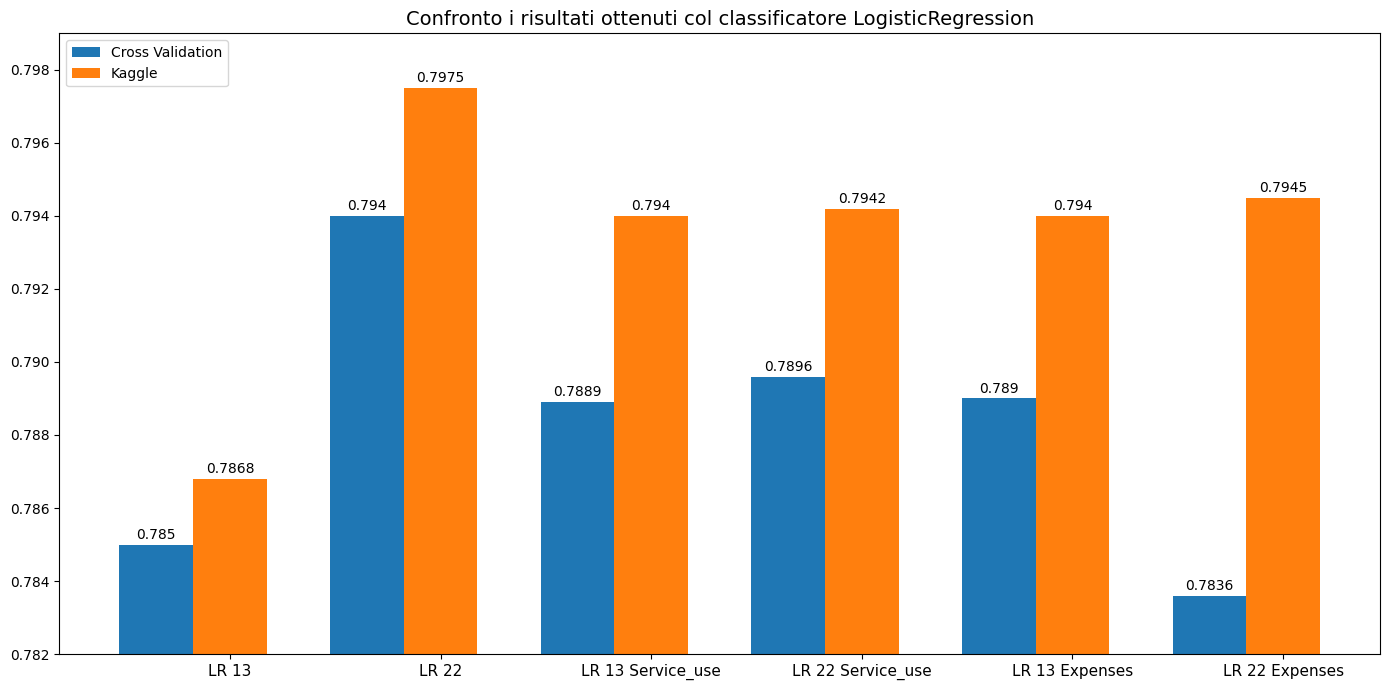

In [ ]:
classifers = ('LR 13', 'LR 22', 'LR 13 Service_use', 'LR 22 Service_use', 'LR 13 Expenses', 'LR 22 Expenses')
scores = {
    'Cross Validation': (0.7850, 0.7940, 0.7889, 0.7896, 0.7890, 0.7836),
    'Kaggle': (0.7868, 0.7975, 0.7940, 0.7942, 0.7940, 0.7945)
}

x = np.arange(len(classifers))  # the label locations
width = 0.35  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(14,7))

for attribute, score in scores.items():
  offset = width * multiplier
  rects = ax.bar(x + offset, score, width, label=attribute)
  ax.bar_label(rects, padding=2)
  multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Confronto i risultati ottenuti col classificatore LogisticRegression', fontsize=14)
ax.set_ylim(0.7820, 0.7990)
ax.set_xticks(x + width, classifers, fontsize=11)
ax.legend(loc='upper left')

plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "LR_Risultati.png")):
  plt.savefig(IMAGE_PATH + "LR_Risultati.png", format="png")

plt.show()